# Task 3

   * Part A - Fitting Simple Linear Regression Model


In [1]:
# Importing package and classes needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Importing and reading csv file
df=pd.read_csv("E:HIGGS_6M.csv")

In [3]:
# Displaying top 5 row
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [4]:
# Getting Information about the data types used and also for checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999999 entries, 0 to 5999998
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   1.000000000000000000e+00    float64
 1   8.692932128906250000e-01    float64
 2   -6.350818276405334473e-01   float64
 3   2.256902605295181274e-01    float64
 4   3.274700641632080078e-01    float64
 5   -6.899932026863098145e-01   float64
 6   7.542022466659545898e-01    float64
 7   -2.485731393098831177e-01   float64
 8   -1.092063903808593750e+00   float64
 9   0.000000000000000000e+00    float64
 10  1.374992132186889648e+00    float64
 11  -6.536741852760314941e-01   float64
 12  9.303491115570068359e-01    float64
 13  1.107436060905456543e+00    float64
 14  1.138904333114624023e+00    float64
 15  -1.578198313713073730e+00   float64
 16  -1.046985387802124023e+00   float64
 17  0.000000000000000000e+00.1  float64
 18  6.579295396804809570e-01    float64
 19  -1.045456994324922562

In [5]:
# Anaylsing the distribution of classes
# data["column_name"].value_counts(), returns unique values in that column

print(df['1.000000000000000000e+00'].value_counts())
print('Zeros', round(df['1.000000000000000000e+00'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Ones', round(df['1.000000000000000000e+00'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

1.0    3178344
0.0    2821655
Name: 1.000000000000000000e+00, dtype: int64
Zeros 47.03 % of the dataset
Ones 52.97 % of the dataset


In [6]:
Ones_df = df.loc[df['1.000000000000000000e+00'] == 1][0:1000] # smaples which have fraud
Zeros_df = df.loc[df['1.000000000000000000e+00'] == 0][0:1000] #   

normal_distributed_df = pd.concat([Ones_df, Zeros_df])

# Shuffle dataframe rows
df_new= normal_distributed_df.sample(frac=1, random_state=100)

print(df_new['1.000000000000000000e+00'].value_counts()/len(df))

1.0    0.000167
0.0    0.000167
Name: 1.000000000000000000e+00, dtype: float64


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 58 to 1180
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   1.000000000000000000e+00    2000 non-null   float64
 1   8.692932128906250000e-01    2000 non-null   float64
 2   -6.350818276405334473e-01   2000 non-null   float64
 3   2.256902605295181274e-01    2000 non-null   float64
 4   3.274700641632080078e-01    2000 non-null   float64
 5   -6.899932026863098145e-01   2000 non-null   float64
 6   7.542022466659545898e-01    2000 non-null   float64
 7   -2.485731393098831177e-01   2000 non-null   float64
 8   -1.092063903808593750e+00   2000 non-null   float64
 9   0.000000000000000000e+00    2000 non-null   float64
 10  1.374992132186889648e+00    2000 non-null   float64
 11  -6.536741852760314941e-01   2000 non-null   float64
 12  9.303491115570068359e-01    2000 non-null   float64
 13  1.107436060905456543e+00    2000

In [8]:
# Importing package for train-test split of datasets to avoid overfitting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

In [9]:
# separating dependent and independent feature

X = df_new.drop("1.000000000000000000e+00",axis=1) 
y = df_new["1.000000000000000000e+00"]

In [10]:
#Feature matrix 

#Train-Test split
# Following an 60-40 split on data.
# The dataset is shuffled with 100 as the random seed for reproducible results.

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.4,random_state=100)
print("Shape of training dataset:",X_train.shape)
print("Shape of test dataset:",X_test.shape)

Shape of training dataset: (1200, 28)
Shape of test dataset: (800, 28)


In [11]:
#Feature Normalization
# standardization-or-mean-removal-and-variance-scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Adding x0 = 1 to each instance for the bias term

X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [12]:
# Importing Package for Logistic Regression model and to show some metric

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
# Calling LogisticRegression function and using fit method on training datasets

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [14]:
# predicting output using predict method of logistic Regression function

y_pred = logmodel.predict(X_test)

In [15]:
false_positive, true_positive, threshold1 = roc_curve(y_test, y_pred)

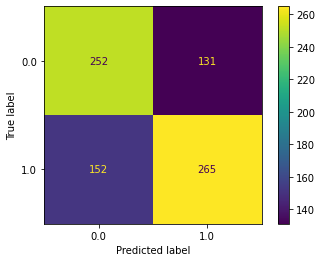

In [16]:
# Plotting 
# Confusion Matrix

class_labels = df_new['1.000000000000000000e+00'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

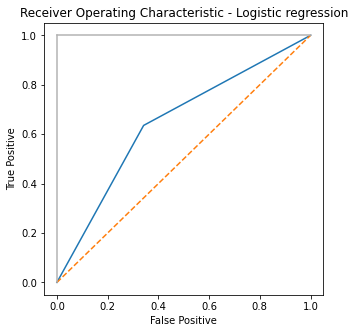

In [17]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive, true_positive)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

In [18]:
# Calculating model accuarcy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.64625

  ## Final Testing
    

In [19]:
df_test=df[5499999:]

In [20]:
# separating dependent and independent feature

X_final_test= df_test.drop("1.000000000000000000e+00",axis=1) 
y_final_test = df_test["1.000000000000000000e+00"]

In [21]:
#Feature Normalization
# standardization-or-mean-removal-and-variance-scaling
X_final_test = scaler.transform(X_final_test)

#Adding x0 = 1 to each instance for the bias term
X_final_test = np.concatenate((np.ones((X_final_test.shape[0],1)),X_final_test),axis=1)

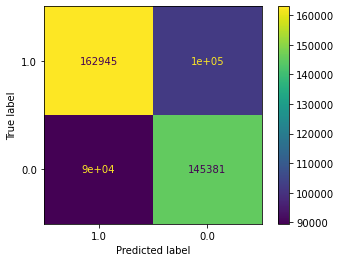

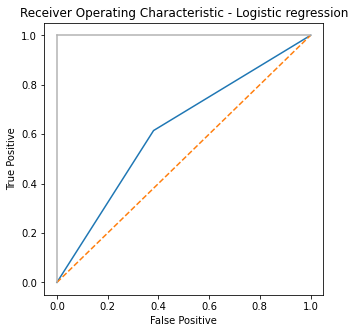

0.616652

In [22]:
# predicting output using predict method of logistic Regression function
y_final_pred = logmodel.predict(X_final_test)
false_positive_test, true_positive_test, threshold1 = roc_curve(y_final_test, y_final_pred)
# Plotting 
# Confusion Matrix
class_labels = df_test['1.000000000000000000e+00'].unique()
cm_new= confusion_matrix(y_final_test, y_final_pred, labels=class_labels)
disp_new= ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=class_labels)
disp_new.plot()

#ROC Plotting
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_test, true_positive_test)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

# Calculating model accuarcy
accuracy_test=accuracy_score(y_final_test,y_final_pred)
accuracy_test